# Attention Maps
#### Set up environment

In [10]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [11]:
shared_path = "/Users/ast/Downloads/attention_weights"
root_path_results = "/Users/ast/Downloads/results"

## All samples

In [12]:
p = os.path.join(shared_path, "true_negatives_tensor_dict.pt")
dTN = torch.load(p)
p = os.path.join(shared_path, "false_positives_tensor_dict.pt")
dFP = torch.load(p)
p = os.path.join(shared_path, "false_negatives_tensor_dict.pt")
dFN = torch.load(p)
p= os.path.join(shared_path, "true_positives_tensor_dict.pt")
dTP = torch.load(p)

In [13]:
d_all_samples = {**dTN, **dFP, **dFN, **dTP}

In [14]:
# Stack all tensors
t_all_samples = torch.stack(list(d_all_samples.values()))

In [15]:
labels = [
    "endothelial_contact",
    "endothelial_stromal_contact",
    "endothelial_tumor_contact",
    "immune_endothelial_radius",
    "immune_radius",
    "immune_stromal_radius",
    "immune_tumor_radius",
    "stromal_contact",
    "stromal_tumor_contact",
    "tumor_contact",
]
better_labels = np.char.title(np.char.replace(np.char.mod('%s', labels), '_', ' '))
better_labels

array(['Endothelial Contact', 'Endothelial Stromal Contact',
       'Endothelial Tumor Contact', 'Immune Endothelial Radius',
       'Immune Radius', 'Immune Stromal Radius', 'Immune Tumor Radius',
       'Stromal Contact', 'Stromal Tumor Contact', 'Tumor Contact'],
      dtype='<U27')

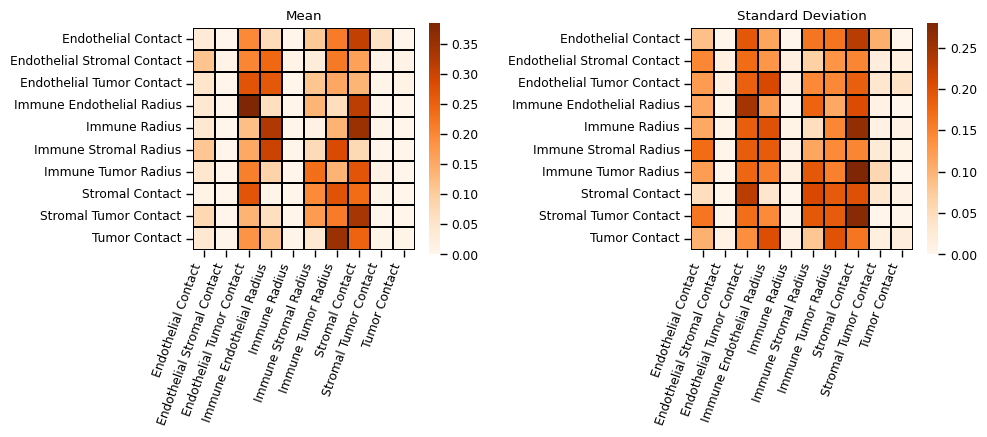

In [16]:
# Create a grid of heatmaps using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
plt.subplots_adjust(wspace=0.8, hspace=0.1)
sns.set_context("paper")

# Plot the heatmap
# Mean
sns.heatmap(
    t_all_samples.mean(dim=1).mean(dim=0)[1:,1:].numpy(),
    ax=axes[0],
    square=True,
    cbar=True, 
    xticklabels=better_labels, 
    yticklabels=better_labels,
    linecolor="black",
    linewidths=0.01,
    cmap="Oranges"
)

# Std
sns.heatmap(
    t_all_samples.mean(dim=1).std(dim=0)[1:,1:].numpy(), 
    ax=axes[1], 
    square=True,
    cbar=True,
    xticklabels=better_labels, 
    yticklabels=better_labels,
    linecolor="black",
    linewidths=0.01,
    cmap="Oranges"
)

# SEt labels and titles
axes[0].set_title(f'Mean')
axes[1].set_title(f'Standard Deviation')
axes[0].set_xticklabels(better_labels, 
                   rotation=70,
                   horizontalalignment='right'
                  )
axes[1].set_xticklabels(better_labels, 
                   rotation=70,
                   horizontalalignment='right'
                  )

# Save figure
path_to_file = os.path.join(root_path_results, "global_self_attention.jpg")
plt.savefig(path_to_file, bbox_inches='tight', dpi=300)

# Display the figure
plt.show()

## Per Head

In [17]:
tensors = t_all_samples

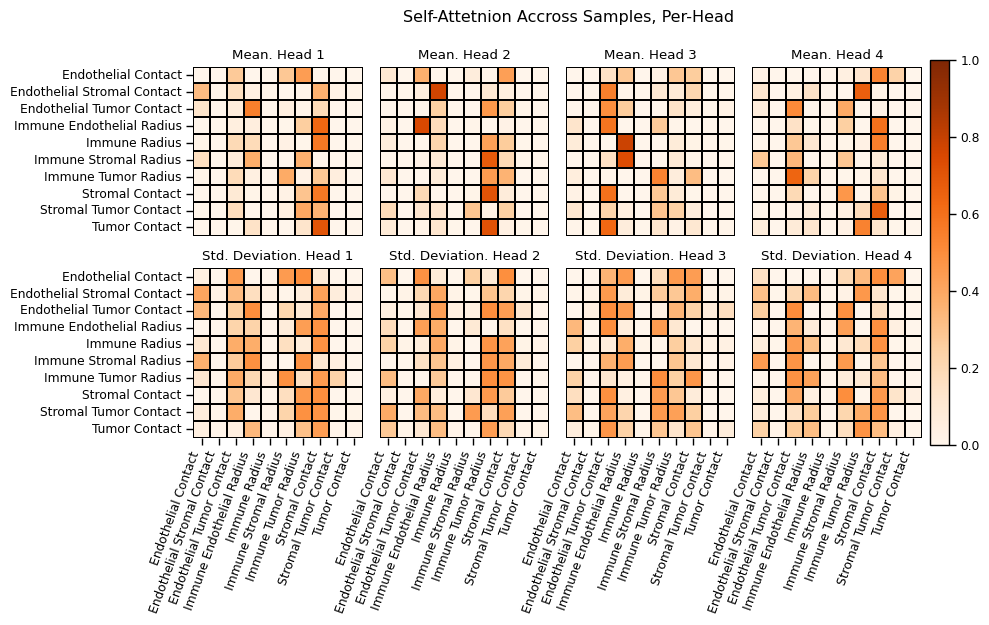

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
sns.set_context("paper")
# Plot the heatmap
# TP
for i in range(tensors.mean(dim=0).shape[0]):
    heatmap_data = tensors.mean(dim=0)[i]
    sns.heatmap(
        heatmap_data[1:,1:].numpy(),
        vmax=1,
        vmin=0,
        ax=axes[0,i],
        square=True,
        cbar= False, 
        xticklabels= False, 
        yticklabels= better_labels if i == 0 else False,
        linecolor="black",
        linewidths=0.01,
        cmap="Oranges"
    )
    axes[0,i].set_title(f'Mean. Head {i+1}')
    
for i in range(tensors.mean(dim=0).shape[0]):
    heatmap_data = tensors.std(dim=0)[i]
    
    if i == 0:
        y_lab = better_labels
    else:
        y_lab = False
        
    sns.heatmap(
        heatmap_data[1:,1:].numpy(),
        vmax=1,
        vmin=0,
        ax=axes[1,i],
        square=True,
        cbar=False, 
        xticklabels=better_labels, 
        yticklabels= y_lab,
        linecolor="black",
        linewidths=0.01,
        cmap="Oranges"
    )
    axes[1,i].set_title(f'Std. Deviation. Head {i+1}')
    axes[1,i].set_xticklabels(better_labels, 
                   rotation=70,
                   horizontalalignment='right'
                  )
plt.suptitle("Self-Attetnion Accross Samples, Per-Head")
cbar = fig.colorbar(axes[1,i].collections[0], ax=axes, orientation='vertical', fraction=0.05, pad=0.01)
path_to_file = os.path.join(root_path_results, "global_self_attention_per_head.jpg")
plt.savefig(path_to_file, bbox_inches='tight', dpi=300)
plt.show()

## Per head per class

In [19]:
tTP = torch.stack(list(dTP.values()))
tensors = tTP

### TP

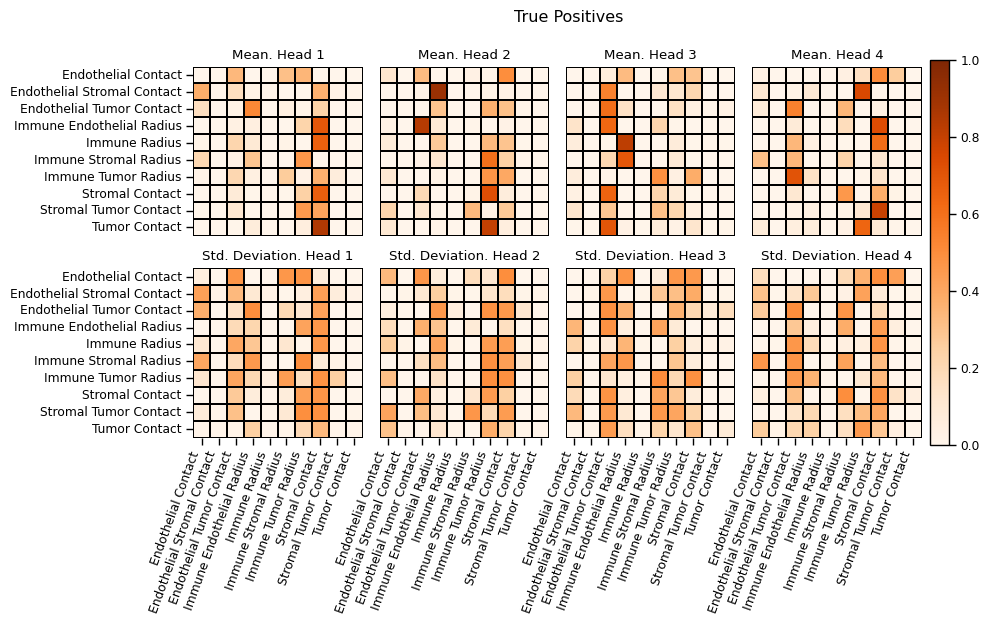

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
sns.set_context("paper")
# Plot the heatmap
# TP
for i in range(tensors.mean(dim=0).shape[0]):
    heatmap_data = tensors.mean(dim=0)[i]
    sns.heatmap(
        heatmap_data[1:,1:].numpy(),
        vmax=1,
        vmin=0,
        ax=axes[0,i],
        square=True,
        cbar= False, 
        xticklabels= False, 
        yticklabels= better_labels if i == 0 else False,
        linecolor="black",
        linewidths=0.01,
        cmap="Oranges"
    )
    axes[0,i].set_title(f'Mean. Head {i+1}')
    
for i in range(tensors.mean(dim=0).shape[0]):
    heatmap_data = tensors.std(dim=0)[i]
    
    if i == 0:
        y_lab = better_labels
    else:
        y_lab = False
        
    sns.heatmap(
        heatmap_data[1:,1:].numpy(),
        vmax=1,
        vmin=0,
        ax=axes[1,i],
        square=True,
        cbar=False, 
        xticklabels=better_labels, 
        yticklabels= y_lab,
        linecolor="black",
        linewidths=0.01,
        cmap="Oranges"
    )
    axes[1,i].set_title(f'Std. Deviation. Head {i+1}')
    axes[1,i].set_xticklabels(better_labels, 
                   rotation=70,
                   horizontalalignment='right'
                  )
plt.suptitle("True Positives")
cbar = fig.colorbar(axes[1,i].collections[0], ax=axes, orientation='vertical', fraction=0.05, pad=0.01)
path_to_file = os.path.join(root_path_results, "TP_self_attention_per_head.jpg")
plt.savefig(path_to_file, bbox_inches='tight', dpi=300)
plt.show()

### TN

In [21]:
tTN = torch.stack(list(dTN.values()))
tensors = tTN

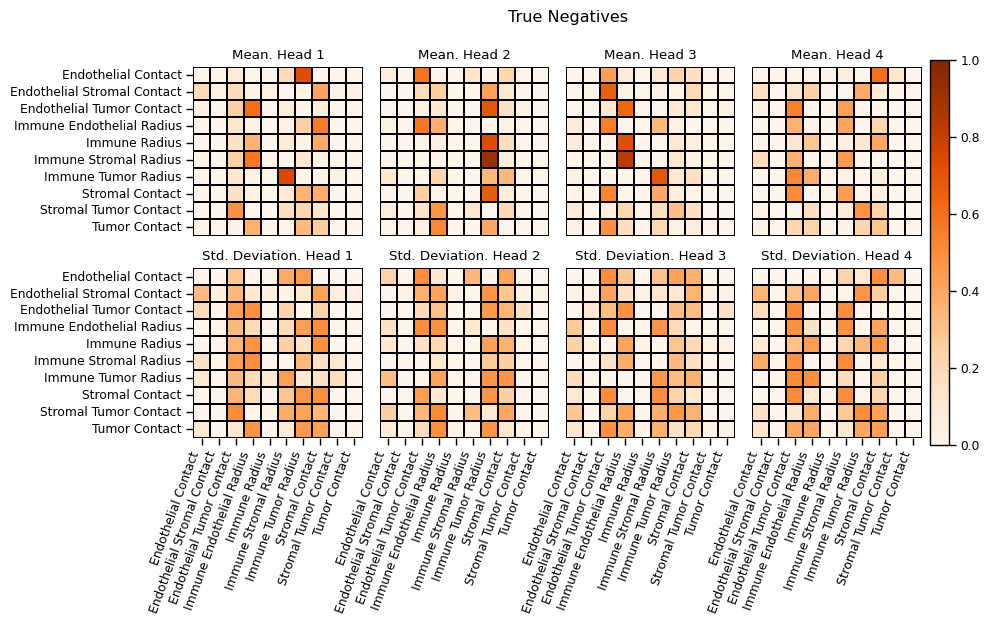

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
sns.set_context("paper")
# Plot the heatmap
# TP
for i in range(tensors.mean(dim=0).shape[0]):
    heatmap_data = tensors.mean(dim=0)[i]
    sns.heatmap(
        heatmap_data[1:,1:].numpy(),
        vmax=1,
        vmin=0,
        ax=axes[0,i],
        square=True,
        cbar= False, 
        xticklabels= False, 
        yticklabels= better_labels if i == 0 else False,
        linecolor="black",
        linewidths=0.01,
        cmap="Oranges"
    )
    axes[0,i].set_title(f'Mean. Head {i+1}')
    
for i in range(tensors.mean(dim=0).shape[0]):
    heatmap_data = tensors.std(dim=0)[i]
    
    if i == 0:
        y_lab = better_labels
    else:
        y_lab = False
        
    sns.heatmap(
        heatmap_data[1:,1:].numpy(),
        vmax=1,
        vmin=0,
        ax=axes[1,i],
        square=True,
        cbar=False, 
        xticklabels=better_labels, 
        yticklabels= y_lab,
        linecolor="black",
        linewidths=0.01,
        cmap="Oranges"
    )
    axes[1,i].set_title(f'Std. Deviation. Head {i+1}')
    axes[1,i].set_xticklabels(better_labels, 
                   rotation=70,
                   horizontalalignment='right'
                  )
    
plt.suptitle("True Negatives")
cbar = fig.colorbar(axes[1,i].collections[0], ax=axes, orientation='vertical', fraction=0.05, pad=0.01)
path_to_file = os.path.join(root_path_results, "TN_self_attention_per_head.jpg")
plt.savefig(path_to_file, bbox_inches='tight', dpi=300)
plt.show()

### FP

In [23]:
tFP = torch.stack(list(dFP.values()))
tensors = tFP

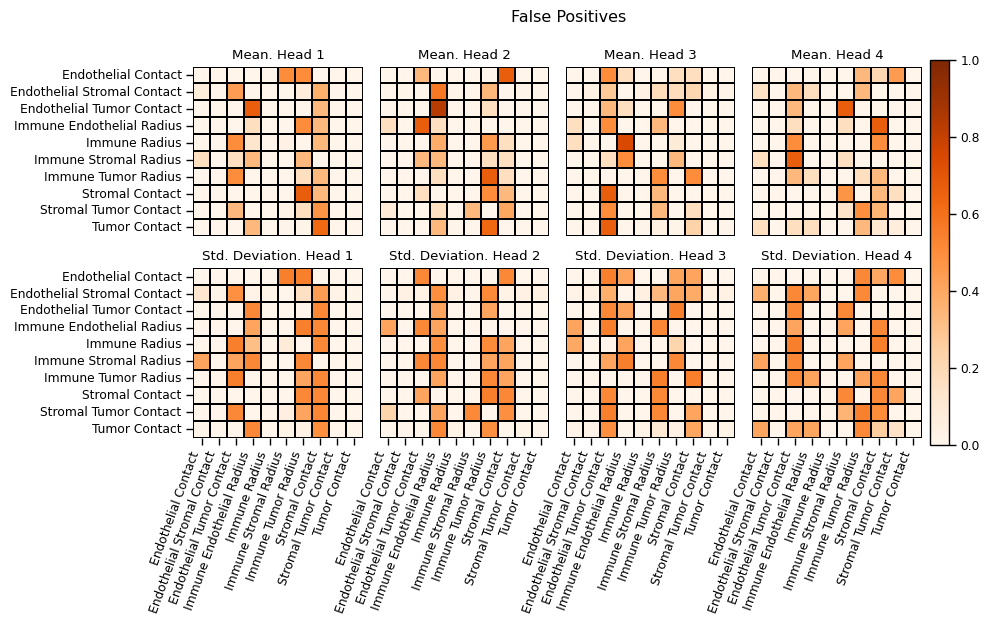

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
sns.set_context("paper")
# Plot the heatmap
# TP
for i in range(tensors.mean(dim=0).shape[0]):
    heatmap_data = tensors.mean(dim=0)[i]
    sns.heatmap(
        heatmap_data[1:,1:].numpy(),
        vmax=1,
        vmin=0,
        ax=axes[0,i],
        square=True,
        cbar= False, 
        xticklabels= False, 
        yticklabels= better_labels if i == 0 else False,
        linecolor="black",
        linewidths=0.01,
        cmap="Oranges"
    )
    axes[0,i].set_title(f'Mean. Head {i+1}')
    
for i in range(tensors.mean(dim=0).shape[0]):
    heatmap_data = tensors.std(dim=0)[i]
    
    if i == 0:
        y_lab = better_labels
    else:
        y_lab = False
        
    sns.heatmap(
        heatmap_data[1:,1:].numpy(),
        vmax=1,
        vmin=0,
        ax=axes[1,i],
        square=True,
        cbar=False, 
        xticklabels=better_labels, 
        yticklabels= y_lab,
        linecolor="black",
        linewidths=0.01,
        cmap="Oranges"
    )
    axes[1,i].set_title(f'Std. Deviation. Head {i+1}')
    axes[1,i].set_xticklabels(better_labels, 
                   rotation=70,
                   horizontalalignment='right'
                  )

cbar = fig.colorbar(axes[1,i].collections[0], ax=axes, orientation='vertical', fraction=0.05, pad=0.01)
plt.suptitle("False Positives")
path_to_file = os.path.join(root_path_results, "FP_self_attention_per_head.jpg")
plt.savefig(path_to_file, bbox_inches='tight', dpi=300)
plt.show()

## FN

In [25]:
tFN = torch.stack(list(dFN.values()))
tensors = tFN

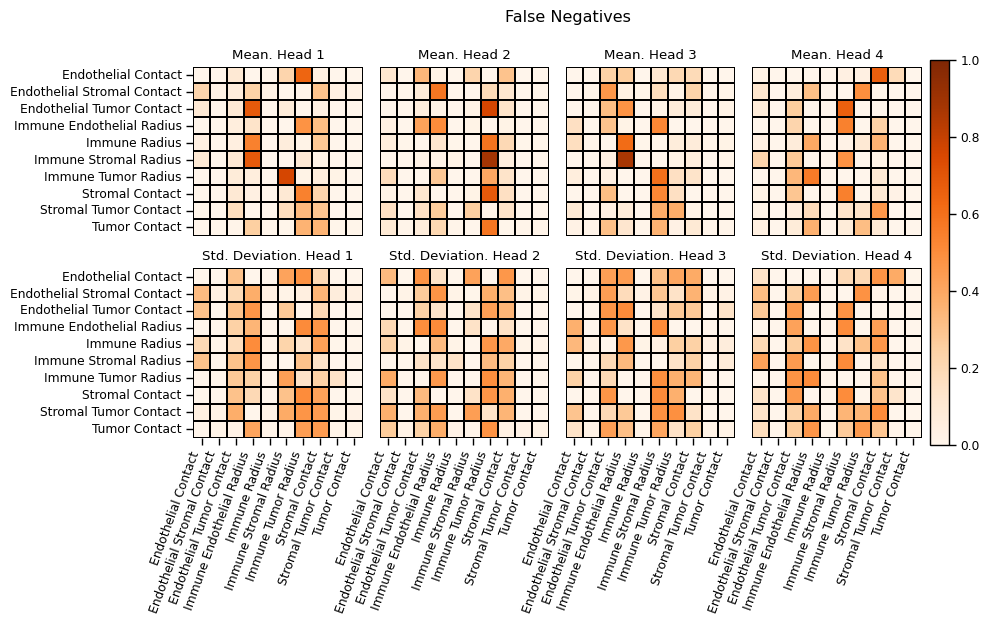

In [26]:
sns.set_context("paper")
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Plot the heatmap
# TP
for i in range(tensors.mean(dim=0).shape[0]):
    heatmap_data = tensors.mean(dim=0)[i]
    sns.heatmap(
        heatmap_data[1:,1:].numpy(),
        vmax=1,
        vmin=0,
        ax=axes[0,i],
        square=True,
        cbar= False, 
        xticklabels= False, 
        yticklabels= better_labels if i == 0 else False,
        linecolor="black",
        linewidths=0.01,
        cmap="Oranges"
    )
    axes[0,i].set_title(f'Mean. Head {i+1}')
    
for i in range(tensors.mean(dim=0).shape[0]):
    heatmap_data = tensors.std(dim=0)[i]
    
    if i == 0:
        y_lab = better_labels
    else:
        y_lab = False
        
    sns.heatmap(
        heatmap_data[1:,1:].numpy(),
        vmax=1,
        vmin=0,
        ax=axes[1,i],
        square=True,
        cbar=False, 
        xticklabels=better_labels, 
        yticklabels= y_lab,
        linecolor="black",
        linewidths=0.01,
        cmap="Oranges"
    )
    axes[1,i].set_title(f'Std. Deviation. Head {i+1}')
    axes[1,i].set_xticklabels(better_labels, 
                   rotation=70,
                   horizontalalignment='right'
                  )

cbar = fig.colorbar(axes[1,i].collections[0], ax=axes, orientation='vertical', fraction=0.05, pad=0.01)
plt.suptitle("False Negatives")
path_to_file = os.path.join(root_path_results, "FN_self_attention_per_head.jpg")
plt.savefig(path_to_file, bbox_inches='tight', dpi=300)
plt.show()